/var/folders/j4/kk26gmps6pb74rjywjb8nmkc0000gn/T/ipykernel_10182/127763238.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


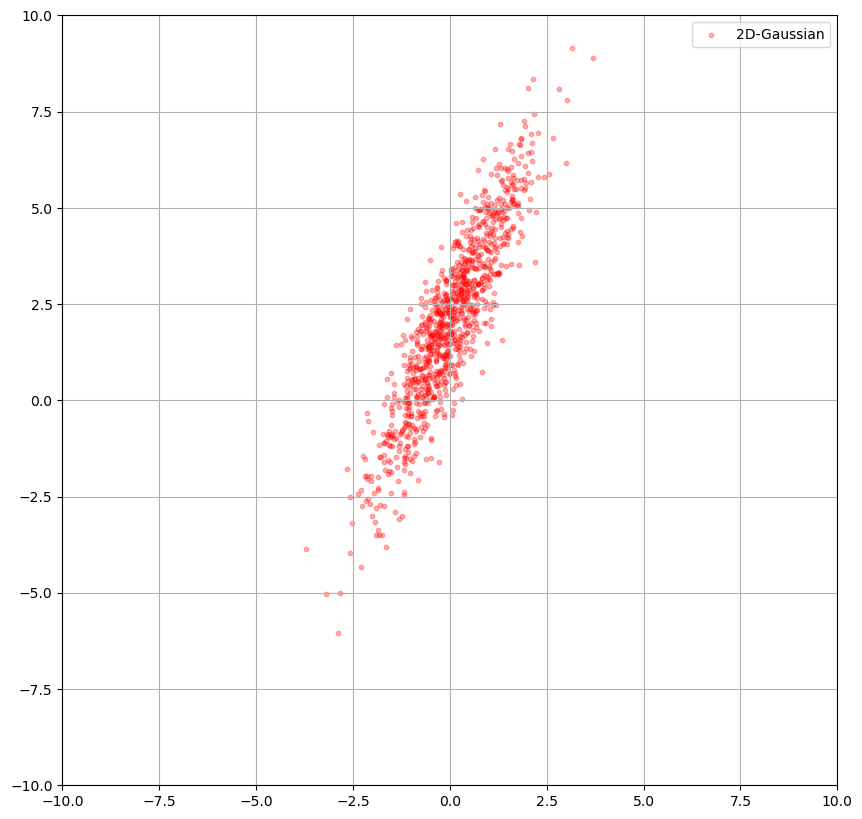

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This is similar to the code from lecture 1
# to sample from a 2D Gaussian Distribution
mean = [0,2]
cov = [[1, 2], [2, 5]]
# Fix random seed to get consistent results
np.random.seed(1024)
X = np.random.multivariate_normal(mean, cov, 1000)
fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
# Set x/y axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
fig.show()

In [7]:
# TODO: Report the estimate mean and covariance
# of the sampled points
mean = np.mean(X, axis = 0)
covariance = np.cov(X, rowvar=False)
print("mean:", mean)
print("covariance:",covariance)


mean: [0.01909265 2.06052385]
covariance: [[1.03589238 2.06244165]
 [2.06244165 5.08839176]]


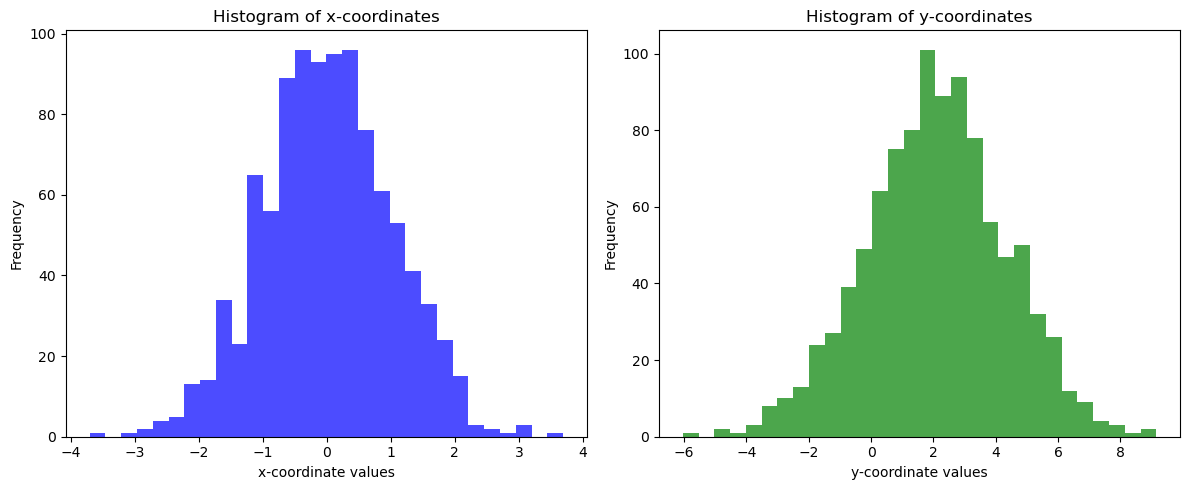

In [9]:
# TODO: Plot the histogram for the x-coordinates of X
# and y-coordinates of X respectively.
# You can use the plt.hist() function
fig, ax = plt.subplots(1,2,figsize = (12,5))

# in the first subplot area
ax[0].hist(X[:,0], bins=30, color='blue', alpha = 0.7)     
ax[0].set_title('Histogram of x-coordinates')
ax[0].set_xlabel('x-coordinate values')
ax[0].set_ylabel('Frequency')

# in the second subplot area
ax[1].hist(X[:, 1], bins=30, color='green', alpha=0.7)
ax[1].set_title('Histogram of y-coordinates')
ax[1].set_xlabel('y-coordinate values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

mean of x-coordinates: 0.019092651459051646
variance of x-coordinates: 1.0348564864741474
mean of y-coordinates: 2.0605238541899022
variance of y-coordinates: 5.083303371449154


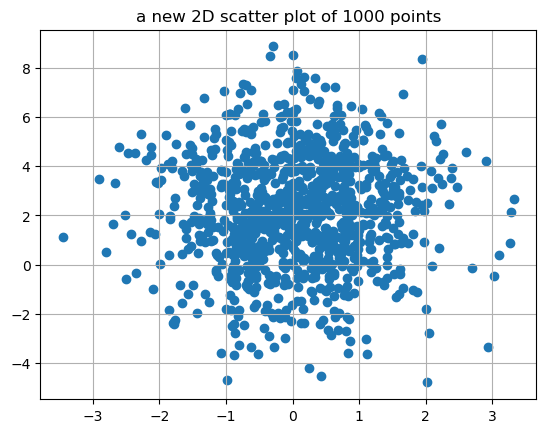

In [15]:
# TODO: Are the x-coordinates of X samples from
# some Gaussian distribution?
# If so, estimate the mean and variance.
# Do the same for the y-coordinates.

# The x-coordinates of X samples are from some Gaussian distribution.
x_mean = np.mean(X[:,0])
x_var = np.var(X[:,0])
print('mean of x-coordinates:',x_mean)
print('variance of x-coordinates:',x_var)

# The y-coordinates of X samples are from some Gaussian distribution.
y_mean = np.mean(X[:,1])
y_var = np.var(X[:,1])
print('mean of y-coordinates:',y_mean)
print('variance of y-coordinates:',y_var)

# TODO: Generate a new 2D scatter plot of 1000 points,
# such that the x-coordinates(y-coordinates) of all the points
# are samples from a 1D Gaussian distribution 
# using the estimated mean and variance based on the x-coordinates(y-coordinates) of X.
new_x = np.random.normal(loc=x_mean, scale = np.sqrt(x_var), size = 1000)
new_y = np.random.normal(loc=y_mean, scale = np.sqrt(y_var), size = 1000)
plt.scatter(new_x, new_y)
plt.grid()
plt.title('a new 2D scatter plot of 1000 points')
plt.show()


/var/folders/j4/kk26gmps6pb74rjywjb8nmkc0000gn/T/ipykernel_10182/3631147731.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


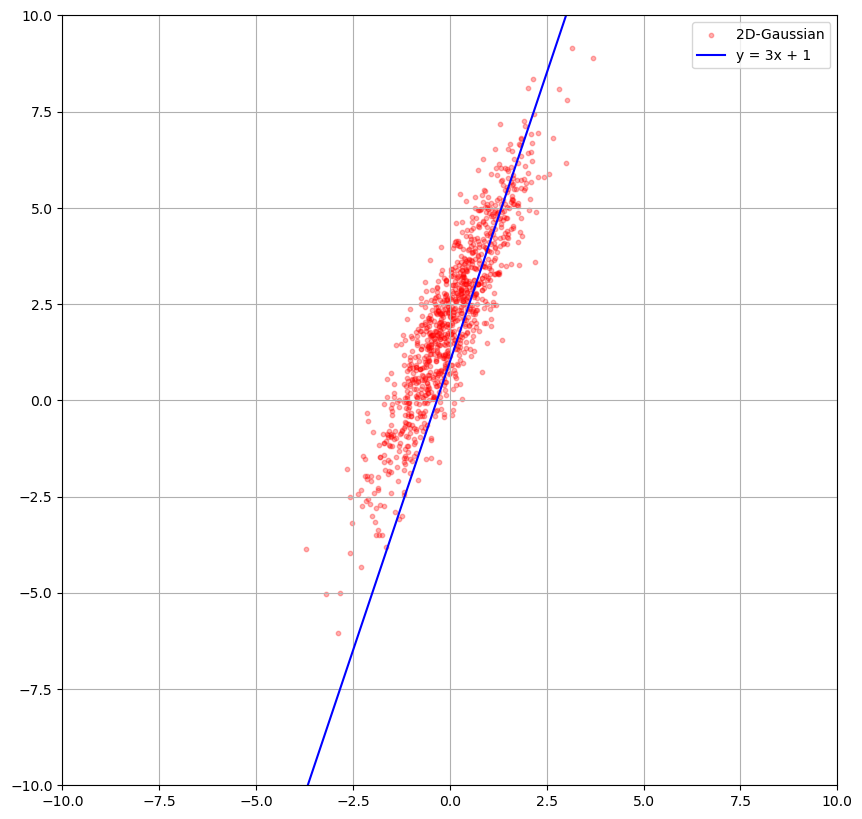

In [25]:
# Back to the original X
fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

# TODO: Plot a line segment with x = [-10, 10]
# and y = 3x + 1 onto the 2D-Gaussian plot.
# The np.linspace() function may be helpful.
x_values = np.linspace(-10,10,100)     # generate a set of values
y_values = 3 * x_values + 1
ax.plot(x_values, y_values, color = 'blue', label = 'y = 3x + 1')
ax.legend()
fig.show()

[[-2.29124877 -2.58249755]
 [-1.57355708 -1.14711417]
 [-0.48285743  1.03428514]
 ...
 [-0.48250705  1.0349859 ]
 [-0.86782709  0.26434583]
 [-1.39745277 -0.79490554]]
(1000, 2)


/var/folders/j4/kk26gmps6pb74rjywjb8nmkc0000gn/T/ipykernel_10182/173146268.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


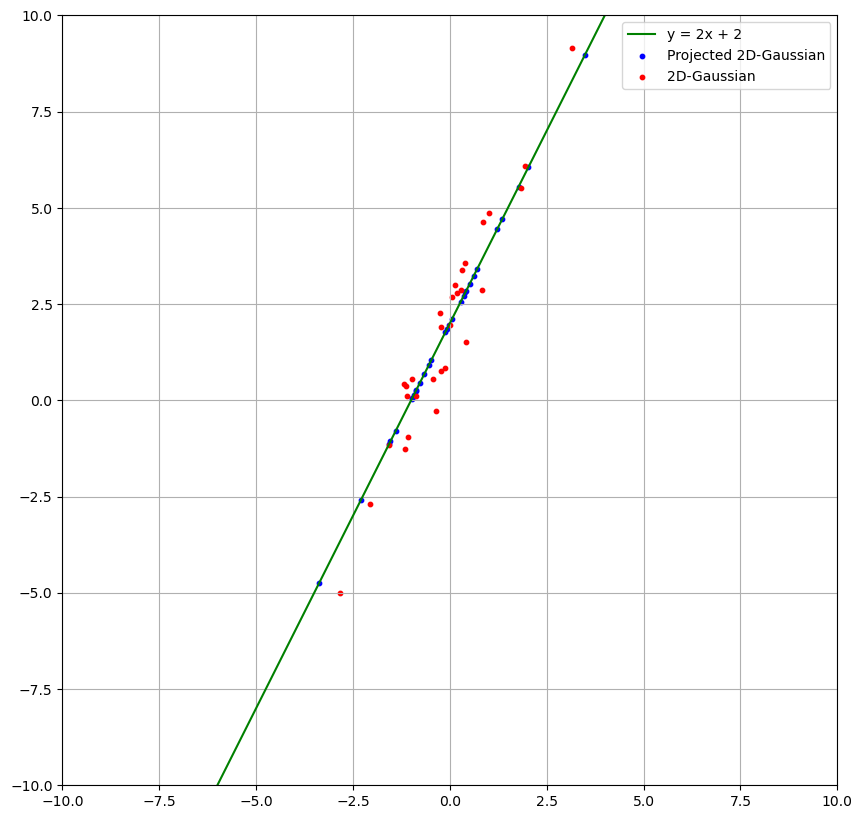

In [41]:
# TODO: Project X onto line y=2x + 2
# and plot the projected points on the 2D space.
# You need to remove this line and assign the projected points to X_proj.
X_proj = np.zeros(X.shape)         # initialize X_proj

"""for \vec{p} = (x_1, y_1), the projection onto a line Ax + By + C = 0 can be expressed as 
          x' = [B(B * x_1 - A * y_1) - A*C] / (A^2 + B^2)
          y' = [A(-B * x_1 + A * y_1) - B*C] / (A^2 + B^2)"""
# For line y = 2x + 2, it is 2x - y + 2 = 0
A = 2
B = -1
C = 2

for i in range(X.shape[0]):
    point = X[i,:]
    x_1, y_1 = point[0], point[1]
    x_proj = (B * (B * x_1 - A * y_1) - A * C) / (A**2 + B**2)
    y_proj = (A * (-B * x_1 + A * y_1) - B * C) / (A**2 + B**2)
    X_proj[i, :] = [x_proj, y_proj]
print(X_proj)
print(X_proj.shape)
    
    
    
# Here we only plot 30 points to check the correctness
fig, ax = plt.subplots(figsize=(10, 10))
x_values_2 = np.linspace(-10,10,100)
y_values_2 = 2 * x_values_2 + 2
ax.plot(x_values_2, y_values_2, color = 'green', label = 'y = 2x + 2')
ax.scatter(X_proj[:30,0], X_proj[:30,1], c='b', s=10.0, alpha=1.0, label="Projected 2D-Gaussian")
ax.scatter(X[:30,0], X[:30,1], c='r', s=10.0, alpha=1.0, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
# You can also add the line from the previous plot for verification.
fig.show()


In [ ]:
# TODO: Draw the histogram of the x-coordinates
# of the projected points.
# Are the x-coordinates of the projected points
# samples from some Gaussian distribution?
# If so, estimate the mean and variance.

mean of x-coordinates: 0.028028071967771222
variance of x-coordinates: 1.1843834728271614


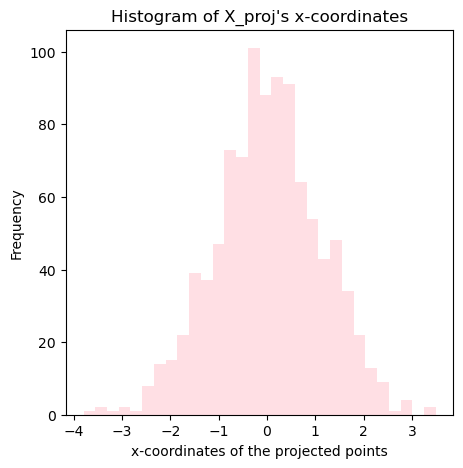

In [47]:
# draw the graph:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(X_proj[:,0], bins = 30, color = 'pink', alpha = 0.5)
ax.set_title('Histogram of X_proj\'s x-coordinates')
ax.set_xlabel('x-coordinates of the projected points')
ax.set_ylabel('Frequency')

# from the histogram we can see that the x-coordinates of the projected points are from some Gaussian distribution

X_proj_mean = np.mean(X_proj[:,0])
X_proj_variance = np.var(X_proj[:,0])
print('mean of x-coordinates:', X_proj_mean)
print('variance of x-coordinates:', X_proj_variance)